In [1]:
# Definindo o valor das seeds para garantir reprodutibilidade

import os
import random
import numpy as np

# Valor da seed a ser utulizada
RANDOM_SEED = 42

# PYTHONHASHSEED environment variable
os.environ['PYTHONHASHSEED']=str(RANDOM_SEED)

# python built-in pseudo-random generator
random.seed(RANDOM_SEED)

# numpy
np.random.seed(RANDOM_SEED)


Neste exemplo treinamos e avaliamos um modelo preditivo usando **T-fold-CrossValidation**, ou Validação Cruzada com T Pastas

- técnica de aprendizagem usada: Árvore de Regressão
- tarefa supervisionada: regressão - valor diabetes
- métricas de avaliação: coeficiente de determinação R2, mean_absolute_error

Importando os recursos necessários:
- numpy: biblioteca numérica
- sklearn: biblioteca de machine learning, em especial a técnica Regression Tree, as métricas de avaliação e o model_selection que nos permite executar validação cruzada

In [2]:
# Importa bibliotecas necessárias 
import numpy as np
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn import model_selection
from sklearn.metrics import mean_absolute_error
from sklearn.datasets import load_diabetes


Carregando a base de dados do problema, representada aqui por X e y, onde:
- X: array contendo N instâncias com M atributos (atributos de entrada do problema)
- y: array contendo o valor do atributo alvo de cada instância em X


In [3]:
# Neste exemplo a base de dados diabetes é composta por 442 instâncias (N=442), 
# e cada instância é representada por um vetor de 10 atributos (M=10).

X, y = load_diabetes(return_X_y=True)
print("Formato de X: ", X.shape)
print("Formato de y: ", y.shape)

Formato de X:  (442, 10)
Formato de y:  (442,)


Neste ponto definimos a técnica de Machine Learning a ser utilizada e treinamos o modelo usando Validação Cruzada. No exemplo, uma árvore de regressão. 

Observer que, diferente do HOLDOUT, não usamos a função *fit()* e sim *model_selection.cross_val_score()*. Esta função irá treinar T modelos. A cada iteração treina usando T-1 pastas e testa com uma delas. Troca a pasta de teste a cada iteração. Ao final fornece como resultado médio + desvio padrão.

OBS: protocolo muito mais robusto que o HOLDOUT, pois cada instância do problema será teste em alguma iteração.

In [4]:
# Definição do modelo  

model = DecisionTreeRegressor(criterion= 'squared_error', max_depth=5, min_samples_split= 10, splitter= 'random', random_state=13)

# Usando a validação cruzada com 5 folds neste exemplo.
T=5 # número de pastas ou folds
result = model_selection.cross_val_score(model, X, y, cv=T)


Avaliação do modelo abaixo:

- A variável *result* que criamos anteriormente tem o R2 calculado pelo *model_selection.cross_val_score()*.

- A função *model_selection.cross_val_predict()* retorna o valor predito para cada exemplo de teste.

- A função mean_absolute_error() retorna o erro médio absoluto calculado sobre a base de teste.

In [5]:

# Mostrando R2 médio e desvio padrão calculados na validação cruzada.
print("\nCross Validation Results %d folds:" % T)
print("R2 médio: %.5f" % result.mean())
print("Mean Std: %.5f" % result.std())

# Calculando o valor para cada exemplo de teste
y_pred = model_selection.cross_val_predict(model, X, y, cv=T)

# Exemplo mostrando o resultado previsto para a primeira instância de teste
print("Primeira instância na base de teste apresenta valor diabetes: %d" % y_pred[0])

# Calculando o erro médio absoluto
mae=mean_absolute_error(y, y_pred)
print("Mean Absolute Error (MAE) calculado na base de teste: %.5f" % mae)

# salvando o modelo 
from joblib import dump, load
with open("model.mod", 'wb') as fo:  
    dump(model, fo)


Cross Validation Results 5 folds:
R2 médio: 0.34563
Mean Std: 0.10874
Primeira instância na base de teste apresenta valor diabetes: 194
Mean Absolute Error (MAE) calculado na base de teste: 49.37025


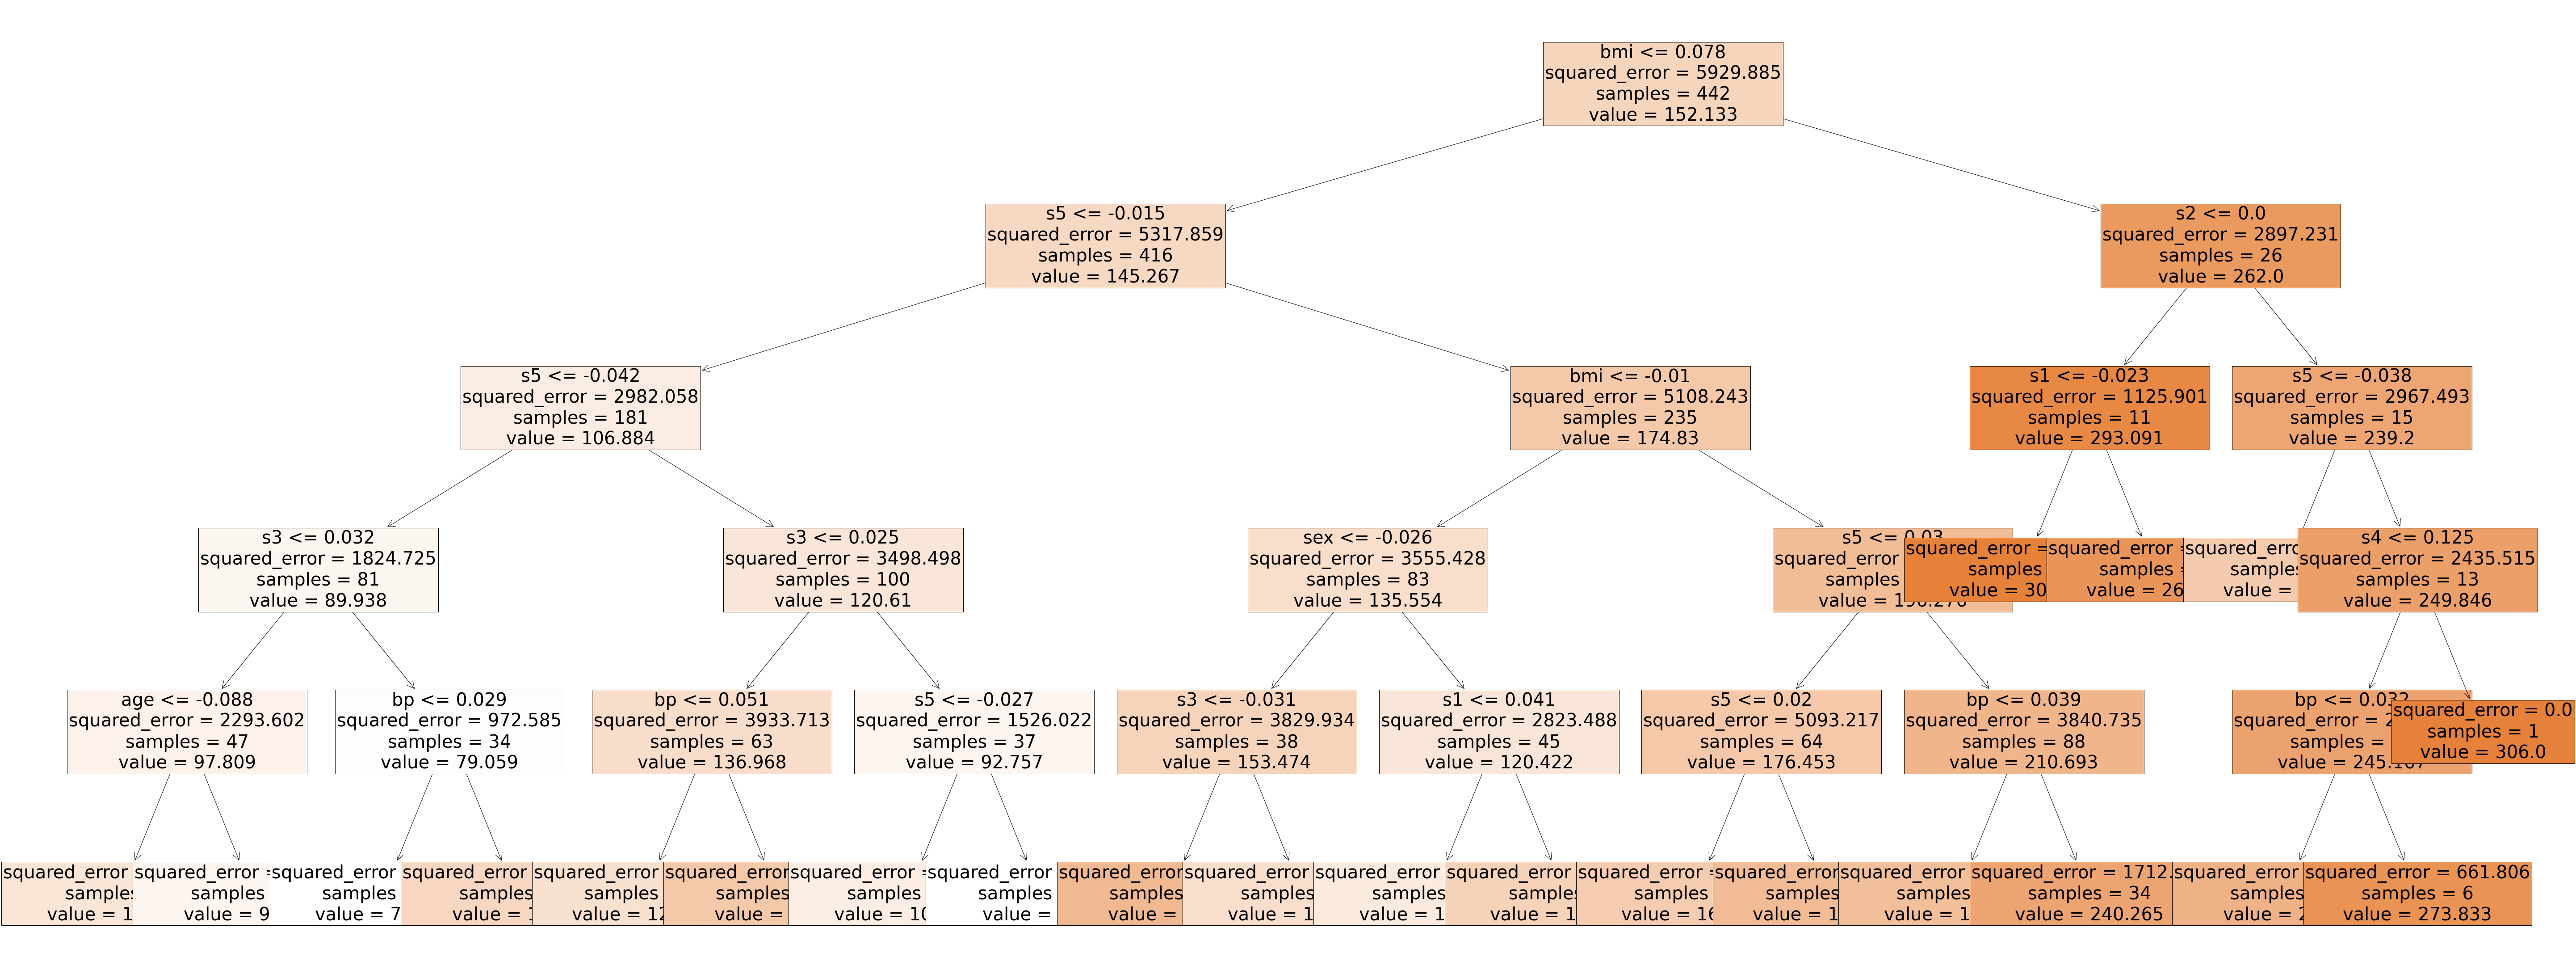

In [6]:
# plotando a árvore após treinamento om a base toda
from sklearn import tree
reg = DecisionTreeRegressor(criterion= 'squared_error', max_depth=5, min_samples_split= 10, splitter= 'random', random_state=13)
reg.fit(X,y)

import matplotlib.pyplot as plt
import numpy as np
from sklearn import tree
data=load_diabetes()

_, ax = plt.subplots(figsize=(100,40))
x=tree.plot_tree(reg, feature_names=data.feature_names, filled=True, ax=ax, fontsize=40)




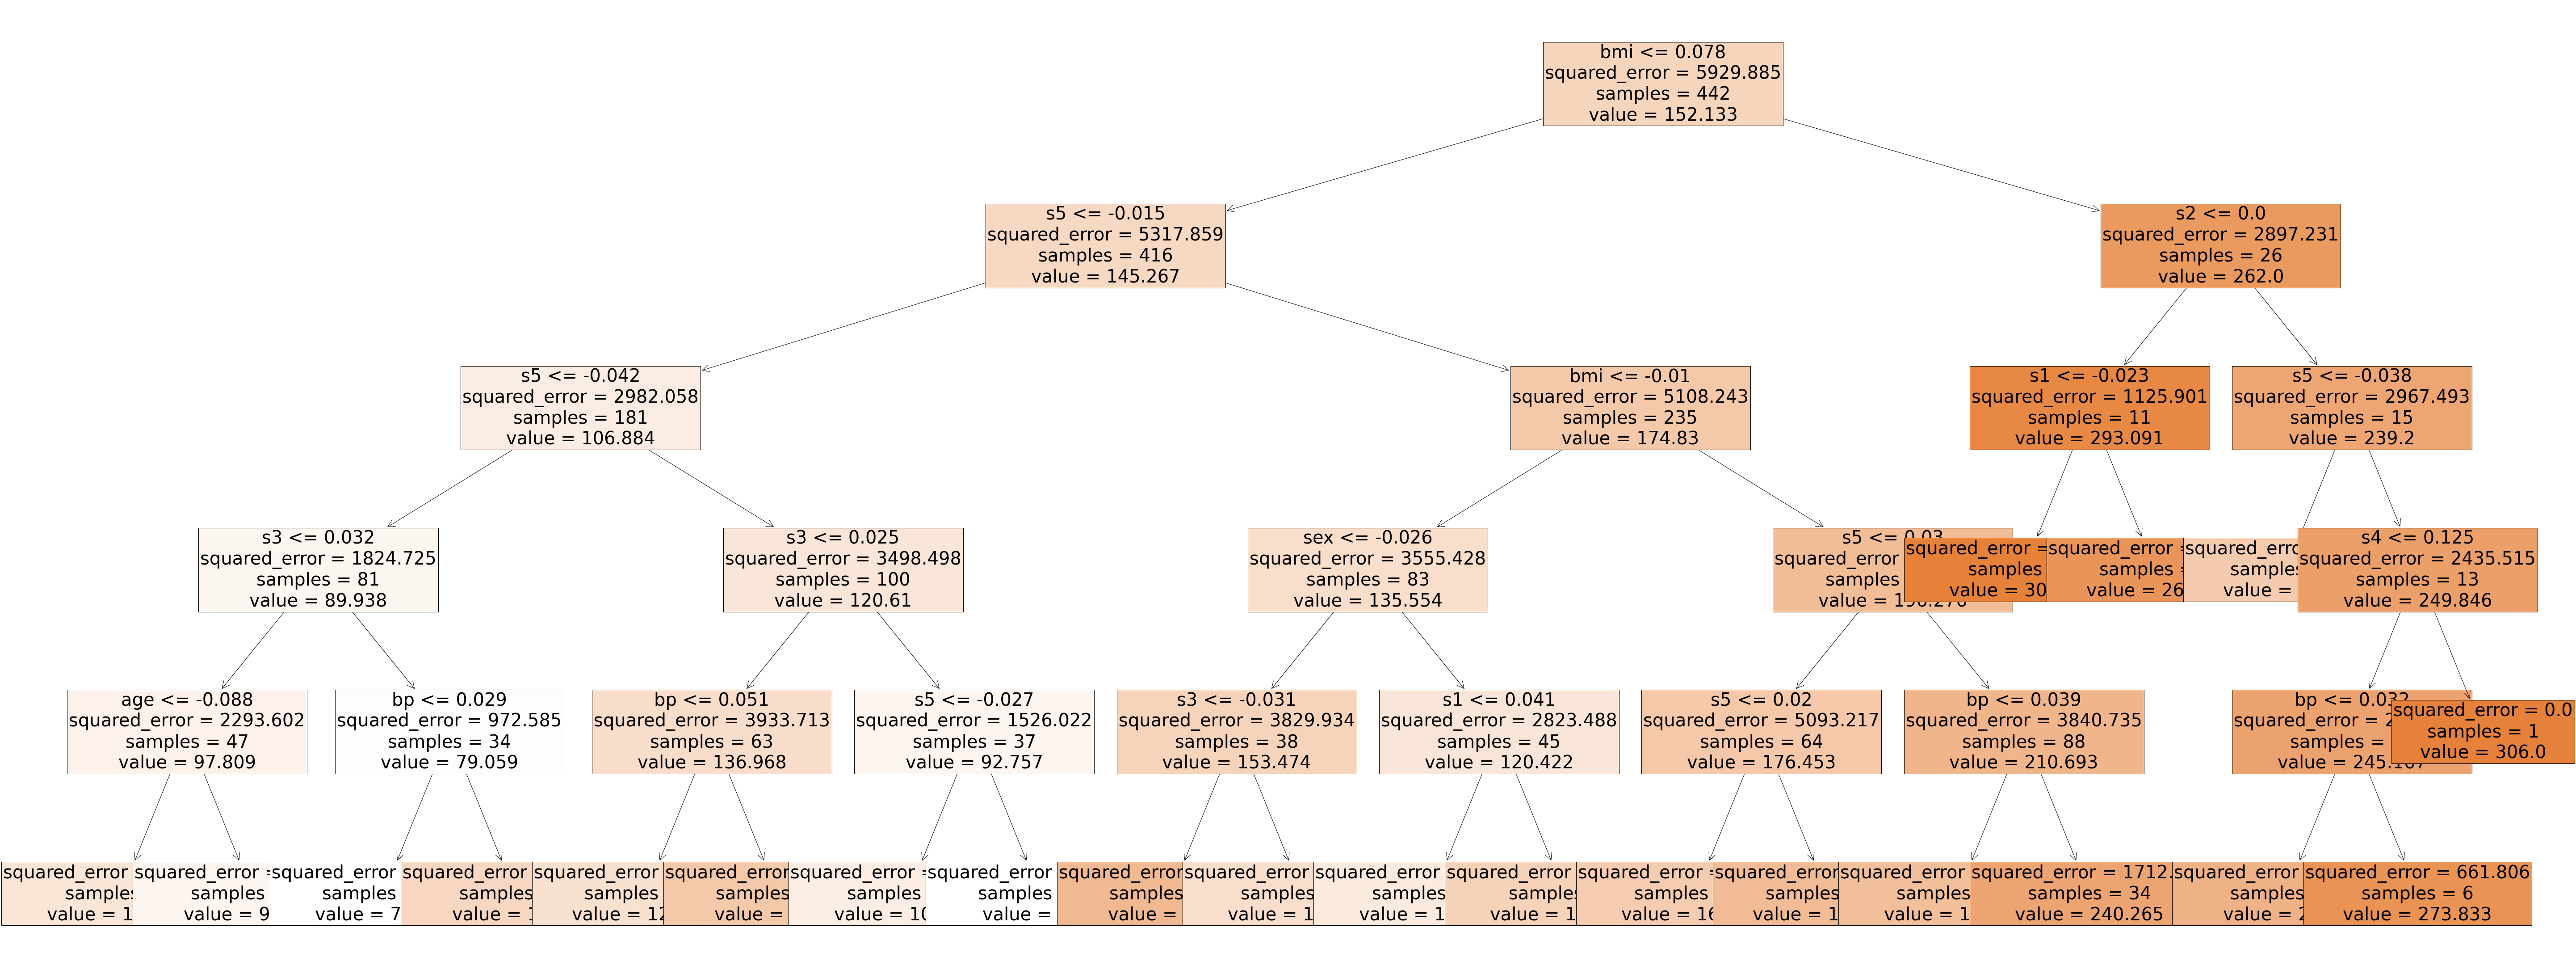

In [7]:
_, ax = plt.subplots(figsize=(100,40))
x=tree.plot_tree(reg, feature_names=data.feature_names, filled=True, ax=ax, fontsize=40)